/home/betty/workspace/venv/mathlibs/lib/python3.6/site-packages/ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in true_divide
/home/betty/workspace/venv/mathlibs/lib/python3.6/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in true_divide
/home/betty/workspace/venv/mathlibs/lib/python3.6/site-packages/ipykernel_launcher.py:126: RuntimeWarning: divide by zero encountered in true_divide
/home/betty/workspace/venv/mathlibs/lib/python3.6/site-packages/ipykernel_launcher.py:126: RuntimeWarning: invalid value encountered in true_divide



The latest transmission rate beta of SIR model: 0.09103368165837217
The latest recovering rate gamma of SIR model: 0.05315762197379137
The latest basic reproduction number R0: 1.7125235907515777

Confirmed cases tomorrow: 178444.0
Infected persons tomorrow: 13900.0
Recovered + Death persons tomorrow: 164544.0

End day: 101
Confirmed cases on the end day: 182284.0

Turing point: 90


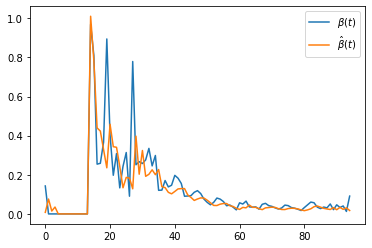

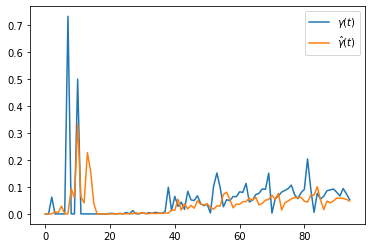

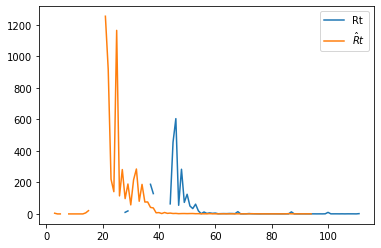

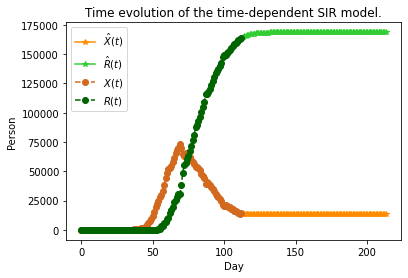

In [1]:
'''
Codes for the paper 'A Time-dependent SIR model for COVID-19 with Undetectable Infected Persons'

Authors: Yi-Cheng Chen, Ping-En Lu, Cheng-Shang Chang, and Tzu-Hsuan Liu
Institute of Communications Engineering, National Tsing Hua University, Hsinchu 30013, Taiwan, R.O.C.
Email: j94223@gmail.com

The latest version of the paper will be placed on this link: http://gibbs1.ee.nthu.edu.tw/A_TIME_DEPENDENT_SIR_MODEL_FOR_COVID_19.PDF

We have uploaded the paper to arXiv (https://arxiv.org/abs/2003.00122).
'''
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


def data_spilt(data, orders, start):
    x_train = np.empty((len(data) - start - orders, orders))
    y_train = data[start + orders:]

    for i in range(len(data) - start - orders):
        x_train[i] = data[i + start:start + orders + i]

    # Exclude the day (Feb. 12, 2020) of the change of the definition of confirmed cases in Hubei China.
    x_train = np.delete(x_train, np.s_[28 - (orders + 1) - start:28 - start], 0)
    y_train = np.delete(y_train, np.s_[28 - (orders + 1) - start:28 - start])

    return x_train, y_train


def ridge(x, y):
    print('\nStart searching good parameters for the task...')
    parameters = {'alpha': np.arange(0, 0.100005, 0.000005).tolist(),
                  "tol": [1e-8],
                  'fit_intercept': [True, False],
                  'normalize': [True, False]}

    clf = GridSearchCV(Ridge(), parameters, n_jobs=-1, cv=5)
    clf.fit(x, y)

    print('\nResults for the parameters grid search:')
    print('Model:', clf.best_estimator_)
    print('Score:', clf.best_score_)

    return clf

########## data:
# X_cml = cumulative confirmed cases
# recovered = cumulative recovered cases
# death = cumulative deaths

########## China data ##########
# data collected from https://voice.baidu.com/act/newpneumonia/newpneumonia

# X_cml = np.array([41, 45, 62, 121, 199, 291, 440, 574, 835, 1279, 1985, 2761, 4535, 5997, 7736, 9720, 11821, 14411, 17238, 20471, 24363, 28060, 31211, 34598, 37251, 40235, 42708, 44730, 59882, 63932, 66576, 68584, 70635, 72528, 74279, 75101, 75993, 76392, 77041, 77262, 77779, 78190, 78630, 78959, 79389, 79968, 80174, 80302, 80422, 80565, 80710, 80813, 80859, 80904, 80924, 80955, 80980, 81003, 81201, 81048, 81077, 81116, 81151, 81235, 81300, 81416, 81498, 81600, 81747, 81846, 81960, 82078, 82213, 82341, 82447, 82545, 82631, 82724, 82802, 82875, 82930, 83005, 83071, 83157, 83249], dtype=np.float64)[:-27]
# recovered = np.array([12, 12, 16, 21, 25, 25, 28, 28, 34, 38, 49, 51, 60, 103, 124, 171, 243, 328, 475, 632, 892, 1153, 1540, 2050, 2651, 3283, 3998, 4742, 5915, 6728, 8101, 9425, 10853, 12561, 14387, 16170, 18279, 20673, 22907, 24757, 27353, 29775, 32531, 36157, 39049, 41675, 44518, 47260, 49914, 52109, 53793, 55477, 57143, 58684, 59982, 61567, 62887, 64216, 65649, 67022, 67863, 68799, 69725, 70547, 71284, 71876, 72382, 72841, 73299, 73791, 74196, 74737, 75122, 75600, 75937, 76225, 76415, 76610, 76785, 76984, 77210, 77348, 77450, 77586, 77711], dtype=np.float64)[:-27]
# death = np.array([2, 3, 3, 3, 4, 6, 9, 18, 25, 41, 56, 80, 106, 132, 170, 213, 259, 304, 361, 425, 491, 564, 637, 723, 812, 909, 1017, 1114, 1368, 1381, 1524, 1666, 1772, 1870, 2006, 2121, 2239, 2348, 2445, 2595, 2666, 2718, 2747, 2791, 2838, 2873, 2915, 2946, 2984, 3015, 3045, 3073, 3100, 3123, 3140, 3162, 3173, 3180, 3194, 3204, 3218, 3231, 3242, 3250, 3253, 3261, 3267, 3276, 3283, 3287, 3293, 3298, 3301, 3306, 3311, 3314, 3321, 3327, 3331, 3335, 3338, 3340, 3340, 3342, 3344], dtype=np.float64)[:-27]
# population = 1439323776

########## Germany data ##########
X_cml = np.array([4.0, 4.0, 4.0, 5.0, 8.0, 10.0, 12.0, 12.0, 12.0, 12.0, 13.0, 13.0, 14.0, 14.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 27.0, 46.0, 48.0, 79.0, 130.0, 159.0, 196.0, 262.0, 482.0, 670.0, 799.0, 1040.0, 1176.0, 1457.0, 1908.0, 2078.0, 3675.0, 4585.0, 5795.0, 7272.0, 9257.0, 12327.0, 15320.0, 19848.0, 22213.0, 24873.0, 29056.0, 32986.0, 37323.0, 43938.0, 50871.0, 57695.0, 62095.0, 66885.0, 71808.0, 77872.0, 84794.0, 91159.0, 96092.0, 100123.0, 103374.0, 107663.0, 113296.0, 118181.0, 122171.0, 124908.0, 127854.0, 130072.0, 131359.0, 134753.0, 137698.0, 141397.0, 143342.0, 145184.0, 147065.0, 148291.0, 150648.0, 153129.0, 154999.0, 156513.0, 157770.0, 158758.0, 159912.0, 161539.0, 163009.0, 164077.0, 164967.0, 165664.0, 166152.0, 167007.0, 168162.0, 169430.0, 170588.0, 171324.0, 171879.0, 172576.0, 173171.0, 174098.0, 174478.0, 175233.0, 175752.0, 176369.0, 176551.0, 177778.0], dtype=np.float64)
recovered = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 12.0, 12.0, 12.0, 14.0, 14.0, 14.0, 14.0, 14.0, 15.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 18.0, 18.0, 18.0, 18.0, 25.0, 25.0, 46.0, 46.0, 46.0, 67.0, 67.0, 105.0, 113.0, 180.0, 233.0, 266.0, 453.0, 3243.0, 3547.0, 5673.0, 6658.0, 8481.0, 9211.0, 13500.0, 16100.0, 18700.0, 22440.0, 24575.0, 26400.0, 28700.0, 28700.0, 36081.0, 46300.0, 52407.0, 53913.0, 57400.0, 60300.0, 64300.0, 68200.0, 72600.0, 77000.0, 83114.0, 85400.0, 88000.0, 91500.0, 95200.0, 99400.0, 103300.0, 109800.0, 109800.0, 112000.0, 114500.0, 117400.0, 120400.0, 123500.0, 126900.0, 129000.0, 130600.0, 132700.0, 135100.0, 139900.0, 141700.0, 141700.0, 143300.0, 144400.0, 145617.0, 147200.0, 148700.0, 150300.0, 151597.0, 152600.0, 154011.0, 155041.0, 155681.0], dtype=np.float64)
death = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 3.0, 3.0, 7.0, 9.0, 11.0, 17.0, 24.0, 28.0, 44.0, 67.0, 84.0, 94.0, 123.0, 157.0, 206.0, 267.0, 342.0, 433.0, 533.0, 645.0, 775.0, 920.0, 1107.0, 1275.0, 1444.0, 1584.0, 1810.0, 2016.0, 2349.0, 2607.0, 2767.0, 2736.0, 3022.0, 3194.0, 3294.0, 3804.0, 4052.0, 4352.0, 4459.0, 4586.0, 4862.0, 5033.0, 5279.0, 5575.0, 5760.0, 5877.0, 5976.0, 6126.0, 6314.0, 6467.0, 6623.0, 6736.0, 6812.0, 6866.0, 6993.0, 6993.0, 7275.0, 7392.0, 7510.0, 7549.0, 7569.0, 7661.0, 7738.0, 7861.0, 7884.0, 7897.0, 7938.0, 7962.0, 8003.0, 8081.0], dtype=np.float64)
population = 83754192

########## data preprocess ##########
X = X_cml - recovered - death
R = recovered + death

n = np.array([population] * len(X), dtype=np.float64)

S = n - X - R

X_diff = np.array([X[:-1], X[1:]], dtype=np.float64).T
R_diff = np.array([R[:-1], R[1:]], dtype=np.float64).T

gamma = (R[1:] - R[:-1]) / X[:-1]
beta = n[:-1] * (X[1:] - X[:-1] + R[1:] - R[:-1]) / (X[:-1] * (n[:-1] - X[:-1] - R[:-1]))
R0 = beta / gamma

########## Parameters for Ridge Regression ##########
##### Orders of the two FIR filters in (12), (13) in the paper. #####
orders_beta = 3
orders_gamma = 3

##### Select a starting day for the data training in the ridge regression. #####
start_beta = 10
start_gamma = 10

########## Print Info ##########
print("\nThe latest transmission rate beta of SIR model:", beta[-1])
print("The latest recovering rate gamma of SIR model:", gamma[-1])
print("The latest basic reproduction number R0:", R0[-1])

########## Ridge Regression ##########
##### Split the data to the training set and testing set #####
x_beta, y_beta = data_spilt(beta, orders_beta, start_beta)
x_gamma, y_gamma = data_spilt(gamma, orders_gamma, start_gamma)

##### Searching good parameters #####
#clf_beta = ridge(x_beta, y_beta)
#clf_gamma = ridge(x_gamma, y_gamma)

##### Training and Testing #####
clf_beta = Ridge(alpha=0.003765, copy_X=True, fit_intercept=False, max_iter=None, normalize=True, random_state=None, solver='auto', tol=1e-08).fit(x_beta, y_beta)
clf_gamma = Ridge(alpha=0.001675, copy_X=True, fit_intercept=False, max_iter=None,normalize=True, random_state=None, solver='auto', tol=1e-08).fit(x_gamma, y_gamma)

beta_hat = clf_beta.predict(x_beta)
gamma_hat = clf_gamma.predict(x_gamma)

##### Plot the training and testing results #####
plt.figure(1)
plt.plot(y_beta, label=r'$\beta (t)$')
plt.plot(beta_hat, label=r'$\hat{\beta}(t)$')
plt.legend()

plt.figure(2)
plt.plot(y_gamma, label=r'$\gamma (t)$')
plt.plot(gamma_hat, label=r'$\hat{\gamma}(t)$')
plt.legend()

plt.figure(3)
plt.plot(R0, label=r'Rt')
plt.plot(beta_hat / gamma_hat, label=r'$\hatRt$')
plt.legend()

########## Time-dependent SIR model ##########

##### Parameters for the Time-dependent SIR model #####
stop_X = 0 # stopping criteria
stop_day = 100 # maximum iteration days (W in the paper)

day_count = 0
turning_point = 0

S_predict = [S[-1]]
X_predict = [X[-1]]
R_predict = [R[-1]]

predict_beta = np.array(beta[-orders_beta:]).tolist()
predict_gamma = np.array(gamma[-orders_gamma:]).tolist()
while (X_predict[-1] >= stop_X) and (day_count <= stop_day):
    if predict_beta[-1] > predict_gamma[-1]:
        turning_point += 1

    next_beta = clf_beta.predict(np.asarray([predict_beta[-orders_beta:]]))[0]
    next_gamma = clf_gamma.predict(np.asarray([predict_gamma[-orders_gamma:]]))[0]

    if next_beta < 0:
        next_beta = 0
    if next_gamma < 0:
        next_gamma = 0

    predict_beta.append(next_beta)
    predict_gamma.append(next_gamma)

    next_S = ((-predict_beta[-1] * S_predict[-1] *
               X_predict[-1]) / n[-1]) + S_predict[-1]
    next_X = ((predict_beta[-1] * S_predict[-1] * X_predict[-1]) /
              n[-1]) - (predict_gamma[-1] * X_predict[-1]) + X_predict[-1]
    next_R = (predict_gamma[-1] * X_predict[-1]) + R_predict[-1]

    S_predict.append(next_S)
    X_predict.append(next_X)
    R_predict.append(next_R)

    day_count += 1

########## Print Info ##########
print('\nConfirmed cases tomorrow:', np.rint(X_predict[1] + R_predict[1]))
print('Infected persons tomorrow:', np.rint(X_predict[1]))
print('Recovered + Death persons tomorrow:', np.rint(R_predict[1]))

print('\nEnd day:', day_count)
print('Confirmed cases on the end day:', np.rint(X_predict[-2] + R_predict[-2]))

print('\nTuring point:', turning_point)

########## Plot the time evolution of the time-dependent SIR model ##########
plt.figure(4)
plt.plot(range(len(X) - 1, len(X) - 1 + len(X_predict)), X_predict, '*-', label=r'$\hat{X}(t)$', color='darkorange')
plt.plot(range(len(X) - 1, len(X) - 1 + len(X_predict)), R_predict, '*-', label=r'$\hat{R}(t)$', color='limegreen')
plt.plot(range(len(X)), X, 'o--', label=r'$X(t)$', color='chocolate')
plt.plot(range(len(X)), R, 'o--', label=r'$R(t)$', color='darkgreen')
plt.xlabel('Day')
plt.ylabel('Person')
plt.title('Time evolution of the time-dependent SIR model.')

plt.legend()

plt.show()